# Health indicators of the City of Chicago
## Suggested  aims
- Get an overview of health data in Chicago
- Investigate, whether there are distinct regions in Chicago
- Predict health indicators (e.g.: cancer rate) by other characteristics (e.g.: unemployment)

## Aim of this notebook
- Provide basic strategies on exploring a heterogeneous data set
- Learn clustering of data
- Learn application of a robust, and veratile machine learning method

## Suggested initial approaches (covered)
- pandas, and its functions to process text
- seaborn for visualization
- scikit learn

## Level
Beginner

# Data background

The city of Chicago holds a great collection of public data at: data.cityofchicago.org

<b>Download Health indicators</b>: https://data.cityofchicago.org/Health-Human-Services/Public-Health-Statistics-Selected-public-health-in/iqnk-2tcu

# Analysis

## General settings

In [1]:
# point this to the folder, where you downloaded health indicators
project_path = '~/Dropbox/data_science_tutorials/templates/crime_and_cancer/project_path/'

In [2]:
%matplotlib inline

import os
import pandas as pd

import matplotlib.pyplot as plt

## Data import and clean-up

In [3]:
# complete the path to the generifs; note that the name of the file might
# differ slightly (e.g.: if file was saved under another name, or if the 
# web-browser would automatically extrat the .gz archive -> consider to double
# check in hour file browser)
path_to_city_data = os.path.join(
    project_path,
    'Public_Health_Statistics-_Selected_public_health_indicators_by_Chicago_community_area.csv')

In [4]:
df = pd.read_csv(path_to_city_data)

In [5]:
# Inspect the top of the table
df.head()

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,...,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,...,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,...,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


In [6]:
# remove community area code, as it won't be needed
df = df.drop('Community Area', axis=1)  

In [7]:
# Define the index. The values of the index won't be used in subsequent calculations
df = df.set_index('Community Area Name')

In [8]:
df.head()

,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,Cancer (All Sites),Colorectal Cancer,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
Community Area Name,,,,,,,,,,,,,,,,,,,,,
Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,176.9,25.3,...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,155.9,17.3,...,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,183.3,20.5,...,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,153.2,8.6,...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,152.1,26.1,...,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


In [9]:
# Remove indicators with incomplete data
# note that in reality, removing entries with incomplete data is very dangerous
# For instance, a recent paper showed that ~half of the political science studies
# in one subfield are wrong, since - what suprprise - some times data isn't provided
# due to non-random reasons (Lall, Political Analysis, 2016: 
# How Multiple Imputation Makes a Difference)

# Anyways, for this tutorial, we remove records wiht incomplete data
df = df.drop(
    [
    'Gonorrhea in Females',
    'Gonorrhea in Males']
, axis=1)

In [10]:
# now convert everyting to numbers
df = df.astype(float)

In [11]:
# remove a community where at least one health indicator is not-a-number
df = df.dropna(axis=1)

## Visualize communities of Chicago

In [12]:
# normalize as different characteristics are measured, 
# e.g.: to maximal value to preserve human interpretability
maximum_of_indicator = df.max()
max_normalized_df = df / maximum_of_indicator

In [13]:
import seaborn as sns

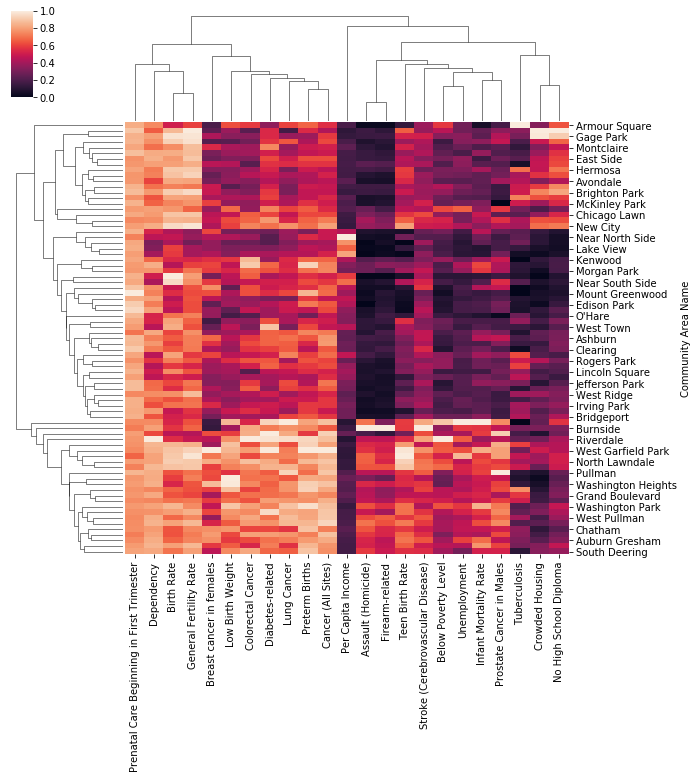

In [14]:
sns.clustermap(max_normalized_df)

## Predict characteristics of communities

In [15]:
# Print all columns
df.columns

Index(['Birth Rate', 'General Fertility Rate', 'Low Birth Weight',
       'Prenatal Care Beginning in First Trimester', 'Preterm Births',
       'Teen Birth Rate', 'Assault (Homicide)', 'Breast cancer in females',
       'Cancer (All Sites)', 'Colorectal Cancer', 'Diabetes-related',
       'Firearm-related', 'Infant Mortality Rate', 'Lung Cancer',
       'Prostate Cancer in Males', 'Stroke (Cerebrovascular Disease)',
       'Tuberculosis', 'Below Poverty Level', 'Crowded Housing', 'Dependency',
       'No High School Diploma', 'Per Capita Income', 'Unemployment'],
      dtype='object')

In [16]:
column_to_predict = [
    'Cancer (All Sites)'
]

columns_to_train = [
    'Prostate Cancer in Males',
    'Birth Rate',
    'General Fertility Rate', 
    'Low Birth Weight', 
    'Prenatal Care Beginning in First Trimester',
    'Preterm Births',
    'Teen Birth Rate',
    'Assault (Homicide)',
    'Firearm-related',
    'Below Poverty Level', 
    'Crowded Housing', 
    'Dependency', 
    'No High School Diploma', 
    'Per Capita Income', 
    'Unemployment'
]

In [17]:
all_target = df.loc[:, column_to_predict]
all_train = df.loc[:, columns_to_train]

In [18]:
# Import convenient function to separate traning and testing sets
from sklearn.model_selection import train_test_split

# Import Random Forest models
from sklearn.ensemble import RandomForestRegressor

# Import convenient function compute Spearman's correlation
from scipy.stats import spearmanr

/Users/tstoeger/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


SpearmanrResult(correlation=0.79117647058823537, pvalue=0.00026194644808245969)


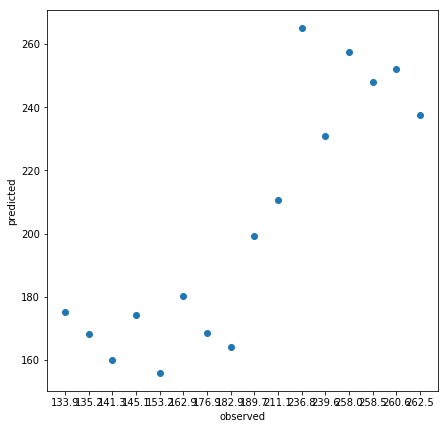

In [19]:
# Separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    all_train, all_target, test_size=0.2)

# Initialize a machine leanring algorithm
rf = RandomForestRegressor()

# Train the machine learning algorithm
rf.fit(X_train, y_train)   # please ignore the warning fo this tutorial

# Predict the value of interest
y_predicted = rf.predict(X_test)

# Visualize the observed and the predicted value
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_predicted)
plt.xlabel('observed')
plt.ylabel('predicted')


print(
    spearmanr(y_test, y_predicted)
)

In [20]:
# Make a table with the importance of features
importance=pd.DataFrame(
    index=columns_to_train,
    columns=['feature_importance'],
    data=rf.feature_importances_)

In [21]:
# Display the table with the importance of features
importance.sort_values('feature_importance', ascending=False)

,feature_importance
Preterm Births,0.336276
Prostate Cancer in Males,0.208068
Low Birth Weight,0.147429
Firearm-related,0.075636
Below Poverty Level,0.042957
Prenatal Care Beginning in First Trimester,0.037377
Unemployment,0.031159
Per Capita Income,0.027059
Dependency,0.022268
No High School Diploma,0.021732


## Getting familiar with models

Try re-running the same code, or removing individual features from columns_to_train. What happens and why?

# Further suggested analysis:
- Combine results of multiple distinct predictions -> does prediction get better?
- Get a map of Chicago and color the communities according to their location in the clustergram (could be done either manually, or electronically)
- Go to the City of Chicago data portal (data.cityofchicago.org), and see, if there are trends between the statistics of individual years (e.g.: how do characteristics change over years?)
- Go to the City of Chicago data portal (data.cityofchicago.org) and find data that might improve predictions accuracy futher
